In [98]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import random
import matplotlib.pyplot as plt

In [99]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [100]:
from pathlib import Path

data_path = Path('data/pizza_steak_sushi/')
train_dir = data_path / 'train'
test_dir = data_path / 'test'

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [101]:
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31, ),
    transforms.ToTensor()
])

train_transform = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.ToTensor()
])

In [102]:
train_data_clean = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform
    )

train_data_augmented1 = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform_trivial
    )

train_data_augmented2 = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform_trivial
    )

train_data_augmented3 = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform_trivial
    )

test_data = datasets.ImageFolder(
    root=test_dir,
    transform=test_transform
    )

train_data_clean, train_data_augmented1, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [103]:
train_data = torch.utils.data.ConcatDataset([train_data_clean, train_data_augmented1, train_data_augmented2, train_data_augmented3])
train_data.datasets[0]

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [104]:
classes = train_data.datasets[0].classes
classes_dict = train_data.datasets[0].class_to_idx
classes, classes_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [105]:
rand_img = random.randrange(len(train_data.datasets[0]))

img, label = train_data.datasets[0][rand_img][0], train_data.datasets[0][rand_img][1]
img, img.shape, label

(tensor([[[0.9882, 0.9686, 0.9569,  ..., 0.6235, 0.6157, 0.6000],
          [0.9647, 0.9412, 0.9412,  ..., 0.4471, 0.4745, 0.4902],
          [0.9647, 0.9647, 0.9765,  ..., 0.3725, 0.4275, 0.5137],
          ...,
          [0.0039, 0.0078, 0.0078,  ..., 0.7490, 0.7490, 0.7294],
          [0.0039, 0.0039, 0.0039,  ..., 0.7529, 0.7529, 0.7412],
          [0.0039, 0.0039, 0.0039,  ..., 0.7765, 0.7569, 0.7412]],
 
         [[0.9451, 0.8706, 0.8157,  ..., 0.3843, 0.4392, 0.4706],
          [0.8667, 0.8118, 0.7882,  ..., 0.1922, 0.2667, 0.3490],
          [0.8784, 0.8627, 0.8588,  ..., 0.1529, 0.1686, 0.2667],
          ...,
          [0.0118, 0.0157, 0.0118,  ..., 0.5216, 0.4706, 0.4000],
          [0.0118, 0.0118, 0.0078,  ..., 0.6078, 0.5490, 0.4549],
          [0.0118, 0.0118, 0.0078,  ..., 0.6824, 0.5804, 0.4549]],
 
         [[0.9020, 0.8000, 0.7294,  ..., 0.3647, 0.4549, 0.6039],
          [0.8000, 0.7294, 0.7020,  ..., 0.1216, 0.2353, 0.4667],
          [0.8157, 0.7961, 0.7961,  ...,

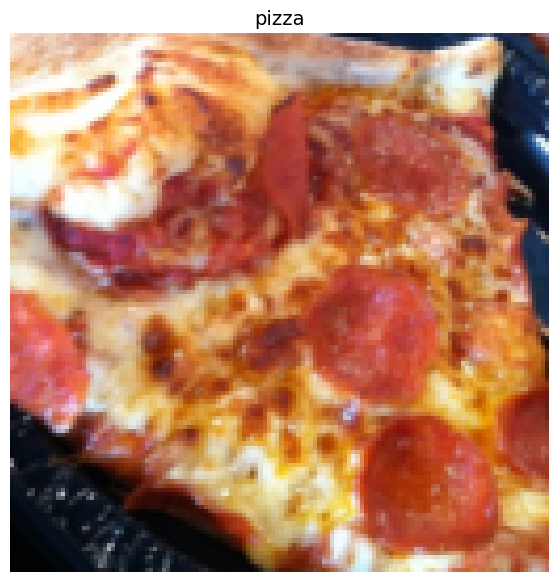

In [106]:
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(classes[label], fontsize=14);

In [107]:
import os

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

In [108]:
class Model(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=4, 
                      stride=2, 
                      padding=0), 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=4,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) 
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=4, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=4, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=2880,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [109]:
torch.manual_seed(42)
model = Model(input_shape=3,
                  hidden_units=20, 
                  output_shape=len(train_data.datasets[0].classes)).to(device)
model

Model(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(4, 4), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(4, 4), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2880, out_features=3, bias=True)
  )
)

In [110]:
asd = torch.randn([1, 3, 128, 128]).to(device)
model(asd)

tensor([[0.0647, 0.0021, 0.0050]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [111]:
from torchinfo import summary
summary(model, input_size=[1, 3, 128, 128])

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [1, 3]                    --
├─Sequential: 1-1                        [1, 20, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 20, 63, 63]           980
│    └─ReLU: 2-2                         [1, 20, 63, 63]           --
│    └─Conv2d: 2-3                       [1, 20, 60, 60]           6,420
│    └─ReLU: 2-4                         [1, 20, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 20, 30, 30]           --
├─Sequential: 1-2                        [1, 20, 12, 12]           --
│    └─Conv2d: 2-6                       [1, 20, 27, 27]           6,420
│    └─ReLU: 2-7                         [1, 20, 27, 27]           --
│    └─Conv2d: 2-8                       [1, 20, 24, 24]           6,420
│    └─ReLU: 2-9                         [1, 20, 24, 24]           --
│    └─MaxPool2d: 2-10                   [1, 20, 12, 12]           --
├─Seq

In [112]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [113]:
def train_step(
        model: torch.nn.Module,
        dataloader: DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim.Optimizer
):
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc

In [114]:
def test_step(
        model: torch.nn.Module,
        dataloader: DataLoader,
        loss_fn: torch.nn.Module,
):
    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            y_pred = model(X)

            loss = loss_fn(y_pred, y)
            test_loss += loss.item()

            y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
            test_acc += (y_pred_class == y).sum().item()/len(y_pred)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    return test_loss, test_acc

In [115]:
def train(
        model: torch.nn.Module, 
        train_dataloader: DataLoader, 
        test_dataloader: DataLoader, 
        optimizer: torch.optim.Optimizer,
        epochs: int,
        loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
        ):
    
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    for epoch in range(epochs):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        print(
            f"Iteration: {epoch+1} | "
            f"Train loss: {train_loss:.4f} | "
            f"Train accuracy: {train_acc*100:.2f}% | "
            f"Test loss: {test_loss:.4f} | "
            f"Test accuracy: {test_acc*100:.2f}%"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [116]:
from timeit import default_timer as timer

torch.manual_seed(42) 
torch.cuda.manual_seed(42)

ITERATIONS = 8

start_time = timer()

model_results = train(
    model=model,
    epochs=ITERATIONS,
    loss_fn=loss_fn,
    optimizer=optimizer,
    test_dataloader=test_dataloader,
    train_dataloader=train_dataloader
    )

end_time = timer()
print(f'Train time: {end_time-start_time:.2f} seconds.')

# # lr = 0.003
# Iteration: 1 | Train loss: 1.1054 | Train accuracy: 32.54% | Test loss: 1.0862 | Test accuracy: 30.02%
# Iteration: 2 | Train loss: 0.9941 | Train accuracy: 53.02% | Test loss: 1.0956 | Test accuracy: 43.37%
# Iteration: 3 | Train loss: 1.0100 | Train accuracy: 55.82% | Test loss: 0.9769 | Test accuracy: 53.69%

Iteration: 1 | Train loss: 1.0996 | Train accuracy: 33.51% | Test loss: 1.1030 | Test accuracy: 19.79%
Iteration: 2 | Train loss: 0.9990 | Train accuracy: 50.00% | Test loss: 1.0999 | Test accuracy: 37.41%
Iteration: 3 | Train loss: 0.9527 | Train accuracy: 58.19% | Test loss: 1.0100 | Test accuracy: 41.38%
Iteration: 4 | Train loss: 0.8775 | Train accuracy: 58.94% | Test loss: 1.0337 | Test accuracy: 43.47%
Iteration: 5 | Train loss: 0.8580 | Train accuracy: 62.18% | Test loss: 0.9623 | Test accuracy: 48.67%
Iteration: 6 | Train loss: 0.7718 | Train accuracy: 64.87% | Test loss: 1.1361 | Test accuracy: 42.52%
Iteration: 7 | Train loss: 0.8030 | Train accuracy: 65.19% | Test loss: 1.0291 | Test accuracy: 44.51%
Iteration: 8 | Train loss: 0.7200 | Train accuracy: 70.37% | Test loss: 0.9960 | Test accuracy: 51.61%
Train time: 226.57 seconds.


In [117]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

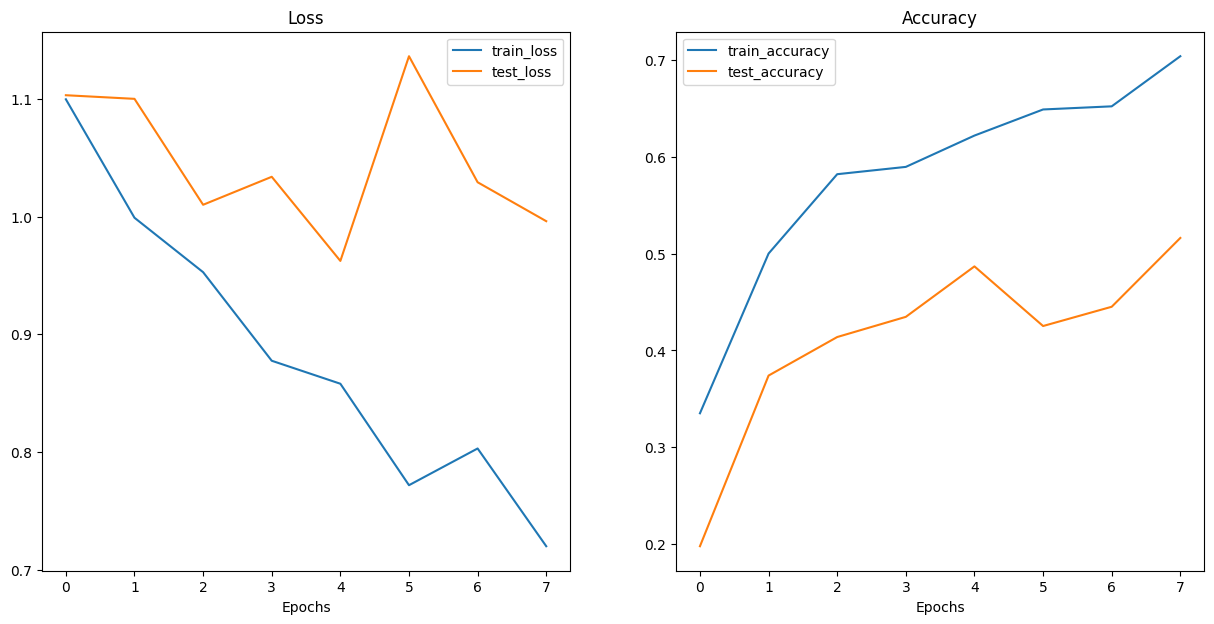

In [118]:
plot_loss_curves(model_results)

In [119]:
import torchvision


pizza_test_img = torchvision.io.read_image(str(data_path / 'pizza_test.jpg')).type(torch.float32) / 255
steak_test_img = torchvision.io.read_image(str(data_path / 'steak_test.jpg')).type(torch.float32) / 255
sushi_test_img = torchvision.io.read_image(str(data_path / 'sushi_test.jpg')).type(torch.float32) / 255



In [120]:
test_image_transform = transforms.Compose([
    transforms.Resize((128, 128)),
])

pizza_test_img_transformed = test_image_transform(pizza_test_img).unsqueeze(dim=0).to(device)
steak_test_img_transformed = test_image_transform(steak_test_img).unsqueeze(dim=0).to(device)
sushi_test_img_transformed = test_image_transform(sushi_test_img).unsqueeze(dim=0).to(device)

In [121]:
model.eval()
with torch.inference_mode():
    pizza_pred = model(pizza_test_img_transformed)
    steak_pred = model(steak_test_img_transformed)
    sushi_pred = model(sushi_test_img_transformed)
print(f'Pizza prediction: {classes[pizza_pred.argmax(dim=1).item()]}\nSteak prediction: {classes[steak_pred.argmax(dim=1).item()]}\nSushi prediction: {classes[sushi_pred.argmax(dim=1).item()]}')

Pizza prediction: sushi
Steak prediction: sushi
Sushi prediction: sushi
